In [1]:
!pip install regex

     ------------------------------------ 269.6/269.6 kB 873.1 kB/s eta 0:00:00


In [2]:
!pip install pandas numpy matplotlib seaborn

     ---------------------------------------- 7.6/7.6 MB 462.6 kB/s eta 0:00:00
     -------------------------------------- 294.6/294.6 kB 1.0 MB/s eta 0:00:00
     ------------------------------------ 103.1/103.1 kB 595.5 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 186.7/186.7 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 56.1/56.1 kB 727.9 kB/s eta 0:00:00


In [3]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('D:\Language detection (NLP)\dataset.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return(text)

In [6]:
df['Text']=df['Text'].apply(remove_pun)

In [7]:
df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [30]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 3.1 MB/s eta 0:00:00


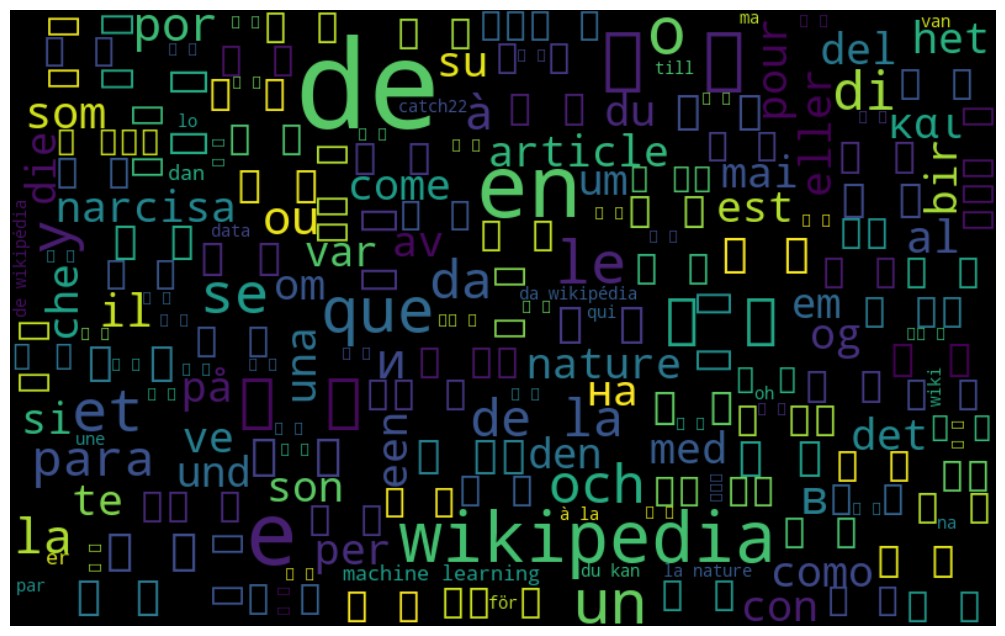

In [32]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
!pip install scikit-learn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [11]:
x

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        1 the word nature is borrowed from the old fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [12]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size =.2)

In [14]:
X_train

8342    det är tillåtet att direkt kopiera stora delar...
3963    dans la zone de description pour cela et maint...
9437                                            في أي وقت
998     89 machine learning approaches in particular c...
6703    oprindeligt var det udelukkende en engelskspro...
                              ...                        
2650    888990 editores com boa reputação na comunidad...
9023    45 في يناير 2013، سميت ويكيبيديا 274301، كويكب...
2098    உதாரணமாக ஆங்கிலப் பதிப்பில் பதிவுசெய்த பயனர் ம...
9650                              es ist als wäre es egal
7393    unaltra categorizzazione dei compiti dellappre...
Name: Text, Length: 8269, dtype: object

In [15]:
from sklearn import feature_extraction

In [16]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='char')

In [17]:
from sklearn import pipeline
from sklearn import linear_model

In [18]:
pipe_model = pipeline.Pipeline([('vec', vec), ('clf', linear_model.LogisticRegression())])

In [19]:
pipe_model.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [20]:
pipe_model.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [21]:
predict_val = pipe_model.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
metrics.accuracy_score(Y_test, predict_val)*100

97.09864603481626

In [24]:
metrics.confusion_matrix(Y_test, predict_val)

array([[ 93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  81,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   0,   0],
       [  0,   0, 104,   1,   0,   2,   0,   0,   0,   0,   0,   1,   0,
          0,   2,   0,   0],
       [  0,   0,   1, 264,   2,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   3, 195,   1,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   1],
       [  0,   0,   2,   2,   1, 100,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  68,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   9,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0, 126,   0,   0,   1,   0,
          5,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  80,   0,   0,   0,
         

C:\Users\HP\AppData\Local\Temp\ipykernel_10636\4071393061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')


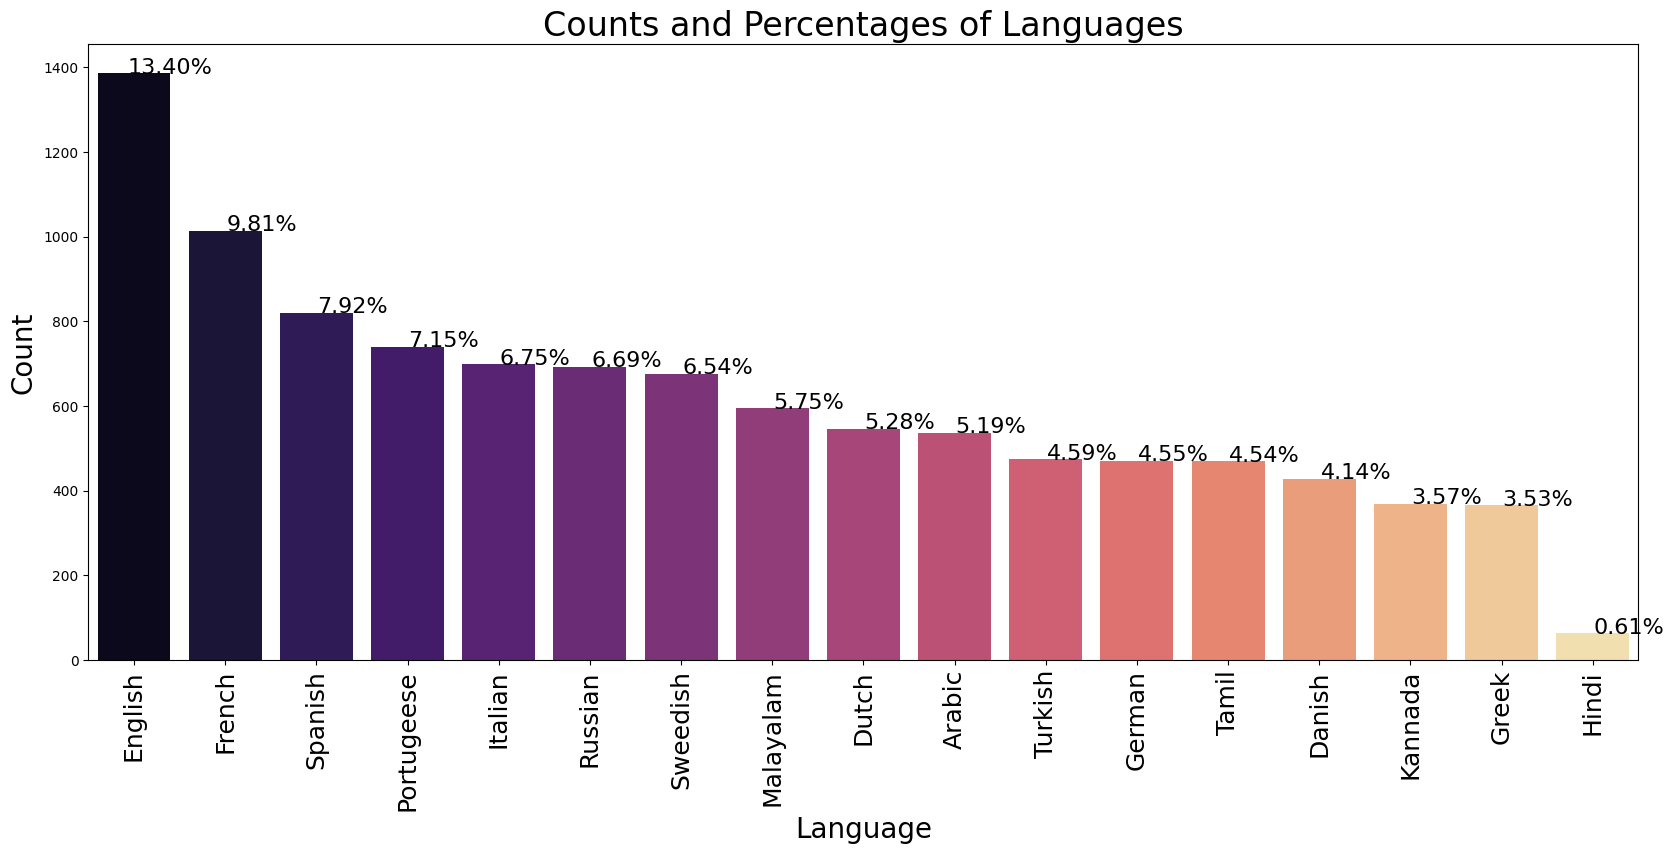

In [25]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')

plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90)
plt.show()

In [26]:
pipe_model.predict(['My name is Nitya'])

array(['English'], dtype=object)

In [28]:
pipe_model.predict(["एक बेहतरीन किताब 100 अच्छे दोस्त के बराबर है, लेकिन एक सर्वश्रेष्ठ दोस्त पुस्तकालय के बराबर है।"])

array(['Hindi'], dtype=object)

In [29]:
pipe_model.predict(["Há males que vêm para o bem."])

array(['Portugeese'], dtype=object)